In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
plt.style.use("fivethirtyeight")




## Goal:

Find correlations between different cars been sold in the USA, find the 'average' car

In [3]:
data = pd.read_csv('vehicles.csv')




In [11]:
#overwiew of the dataset
data

,region,price,year,manufacturer,model,cylinders,fuel,odometer
0,auburn,35990,2010,chevrolet,corvette grand sport,8 cylinders,gas,32742.0
1,auburn,7500,2014,hyundai,sonata,4 cylinders,gas,93600.0
2,auburn,4900,2006,bmw,x3 3.0i,6 cylinders,gas,87046.0
3,auburn,2000,1974,chevrolet,c-10,4 cylinders,gas,190000.0
4,auburn,19500,2005,ford,f350 lariat,8 cylinders,diesel,116000.0
...,...,...,...,...,...,...,...,...
458208,wausau,14995,2014,cadillac,srx,6 cylinders,gas,83790.0
458209,wausau,17895,2018,hyundai,tucson,4 cylinders,gas,31888.0
458210,wyoming,17900,2014,cadillac,cts coupe awd,6 cylinders,gas,53000.0
458211,wyoming,1300,2008,jeep,grand cherokee,8 cylinders,gas,164000.0


In [4]:
data.describe(percentiles=None)


,price,year,odometer
count,4.582130e+05,457163.000000,4.029100e+05
mean,4.042093e+04,2010.746067,1.016698e+05
std,8.194599e+06,8.868136,3.228623e+06
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.900000e+03,2008.000000,4.087700e+04
50%,1.099500e+04,2013.000000,8.764100e+04
75%,2.149500e+04,2016.000000,1.340000e+05
max,3.615215e+09,2021.000000,2.043756e+09


# Statistics of a set

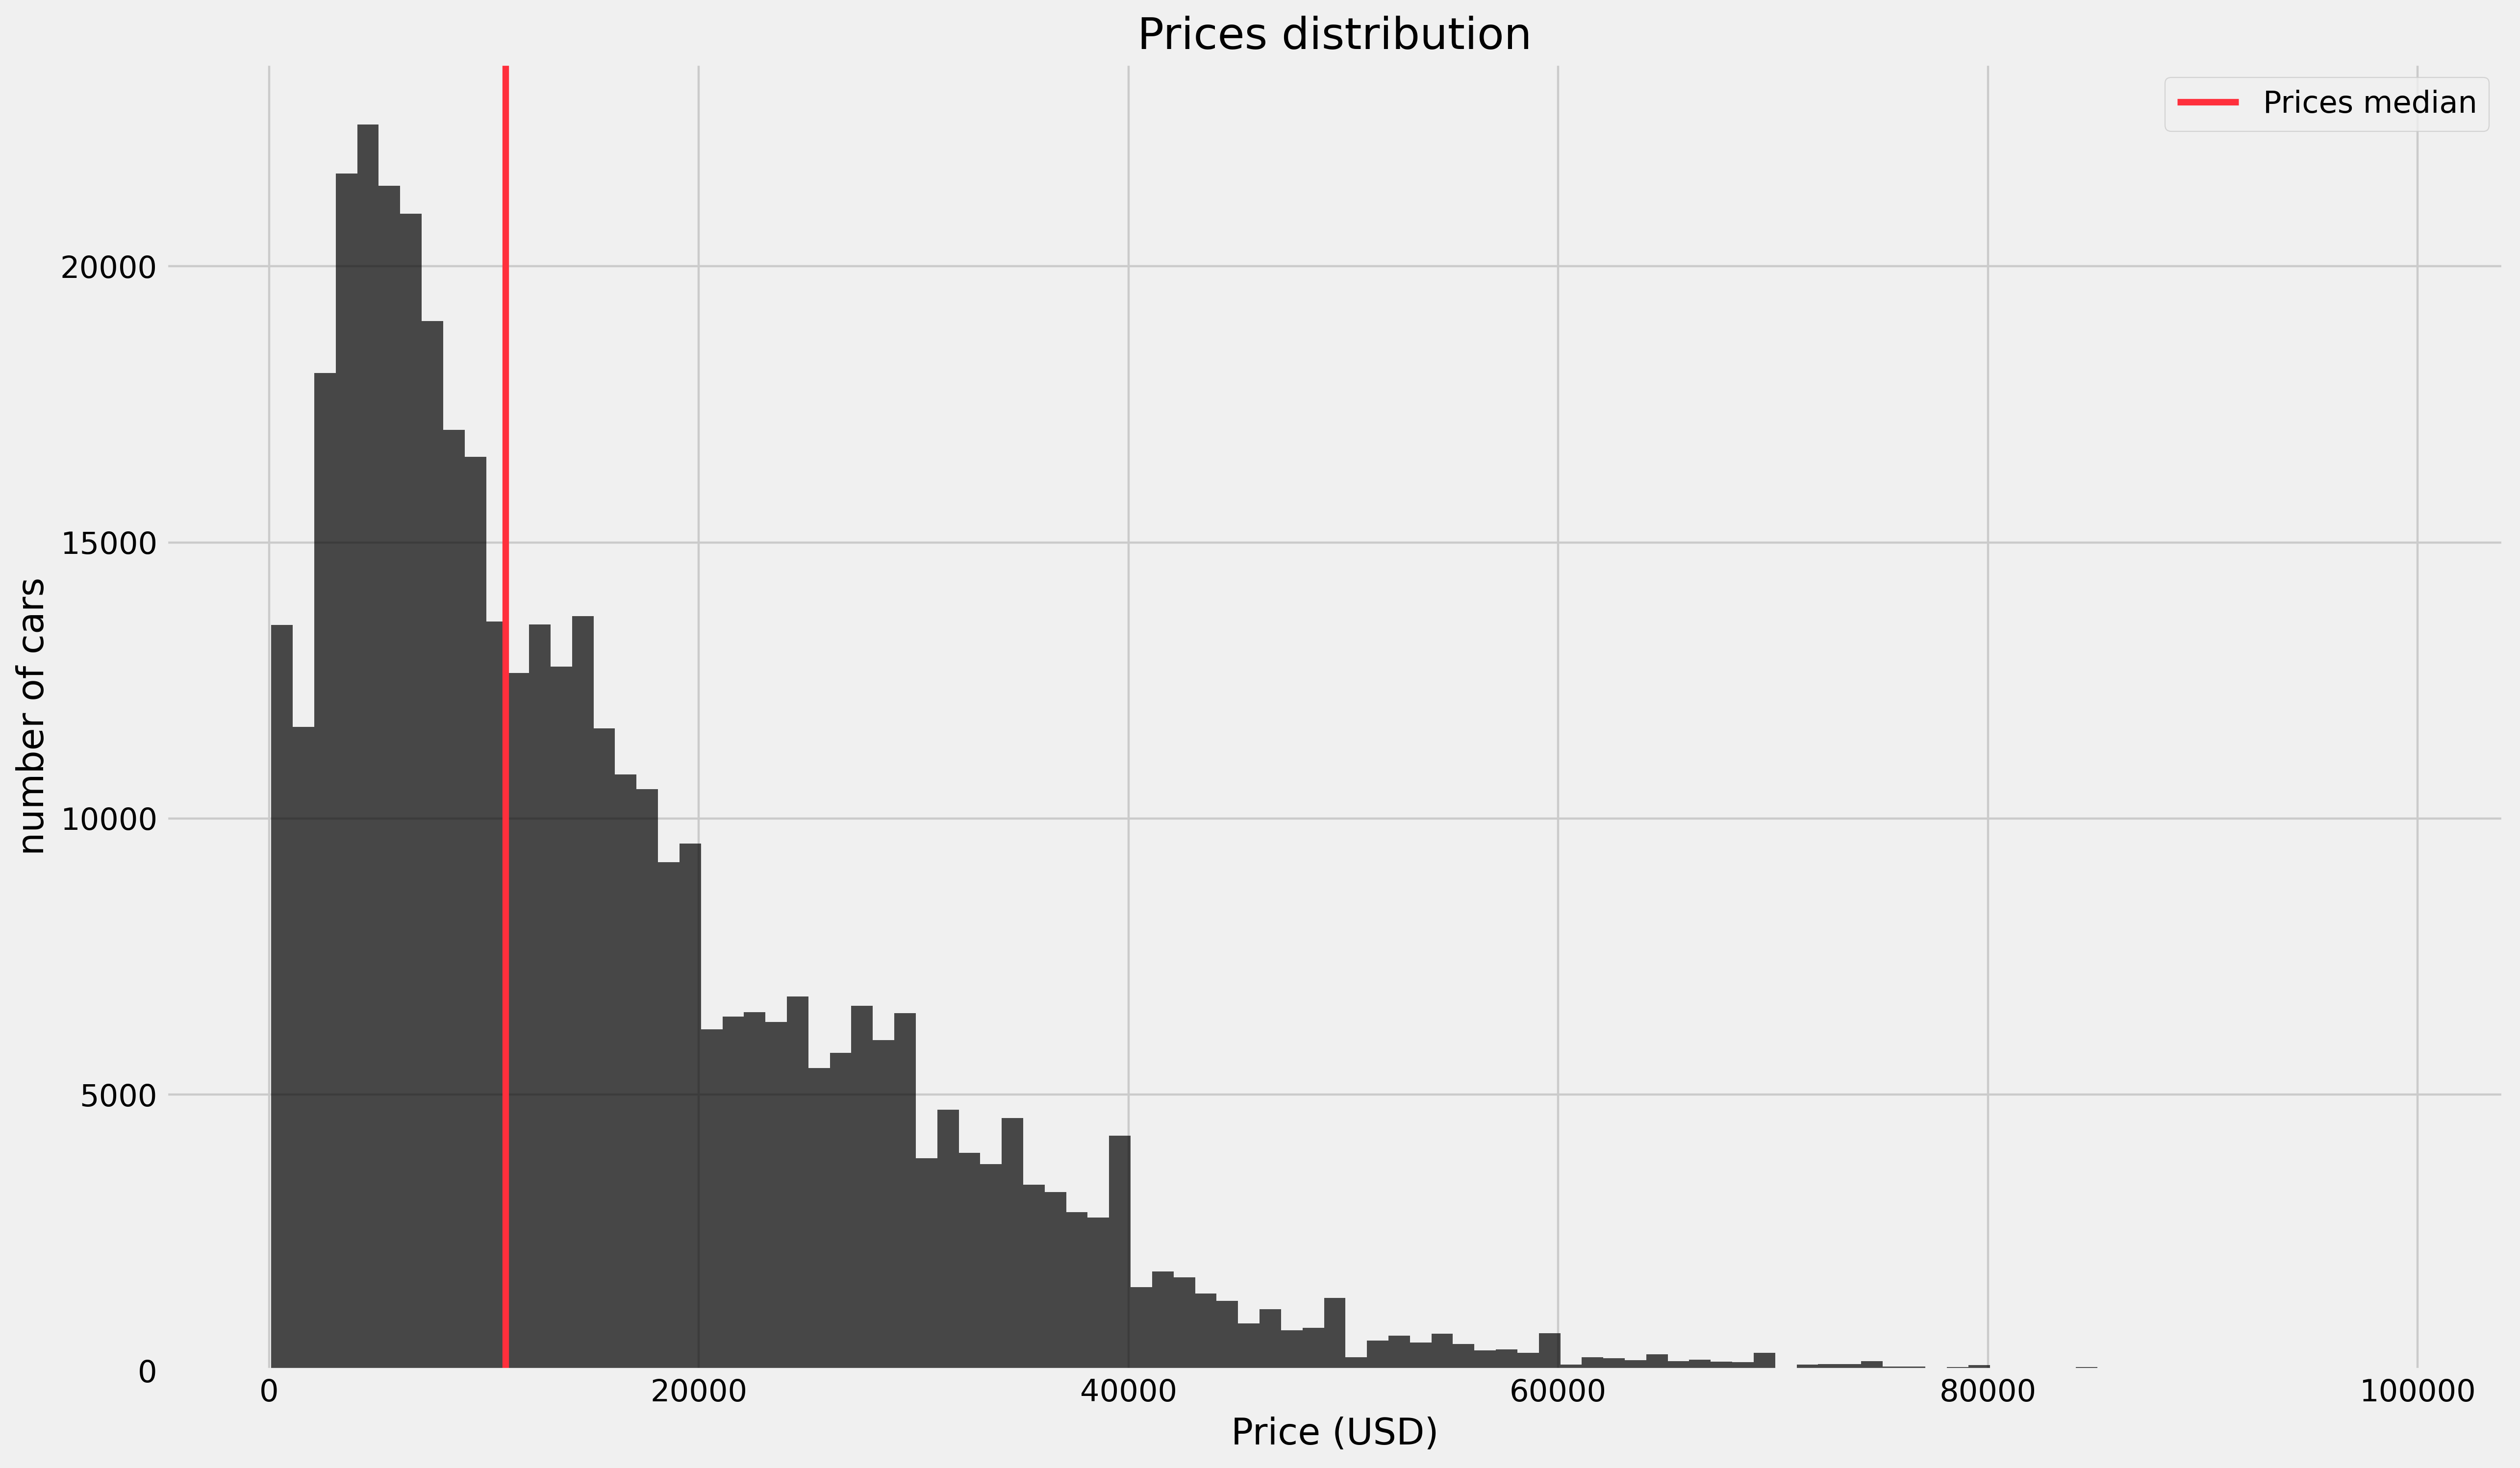

In [5]:

bins=[]

plt.figure(figsize=(16, 9), dpi = 320)
for i in range (100, 100000, 1000):
    bins.append(i)

plt.hist(data['price'], bins=bins, color='Black', alpha= 0.7)
plt.tight_layout()


plt.axvline(data['price'].median(), color = '#ff2f3c', linewidth = 3, label = 'Prices median')
plt.title ('Prices distribution')
plt.gca().set(xlabel='Price (USD)', ylabel='number of cars')

plt.legend()
plt.show()


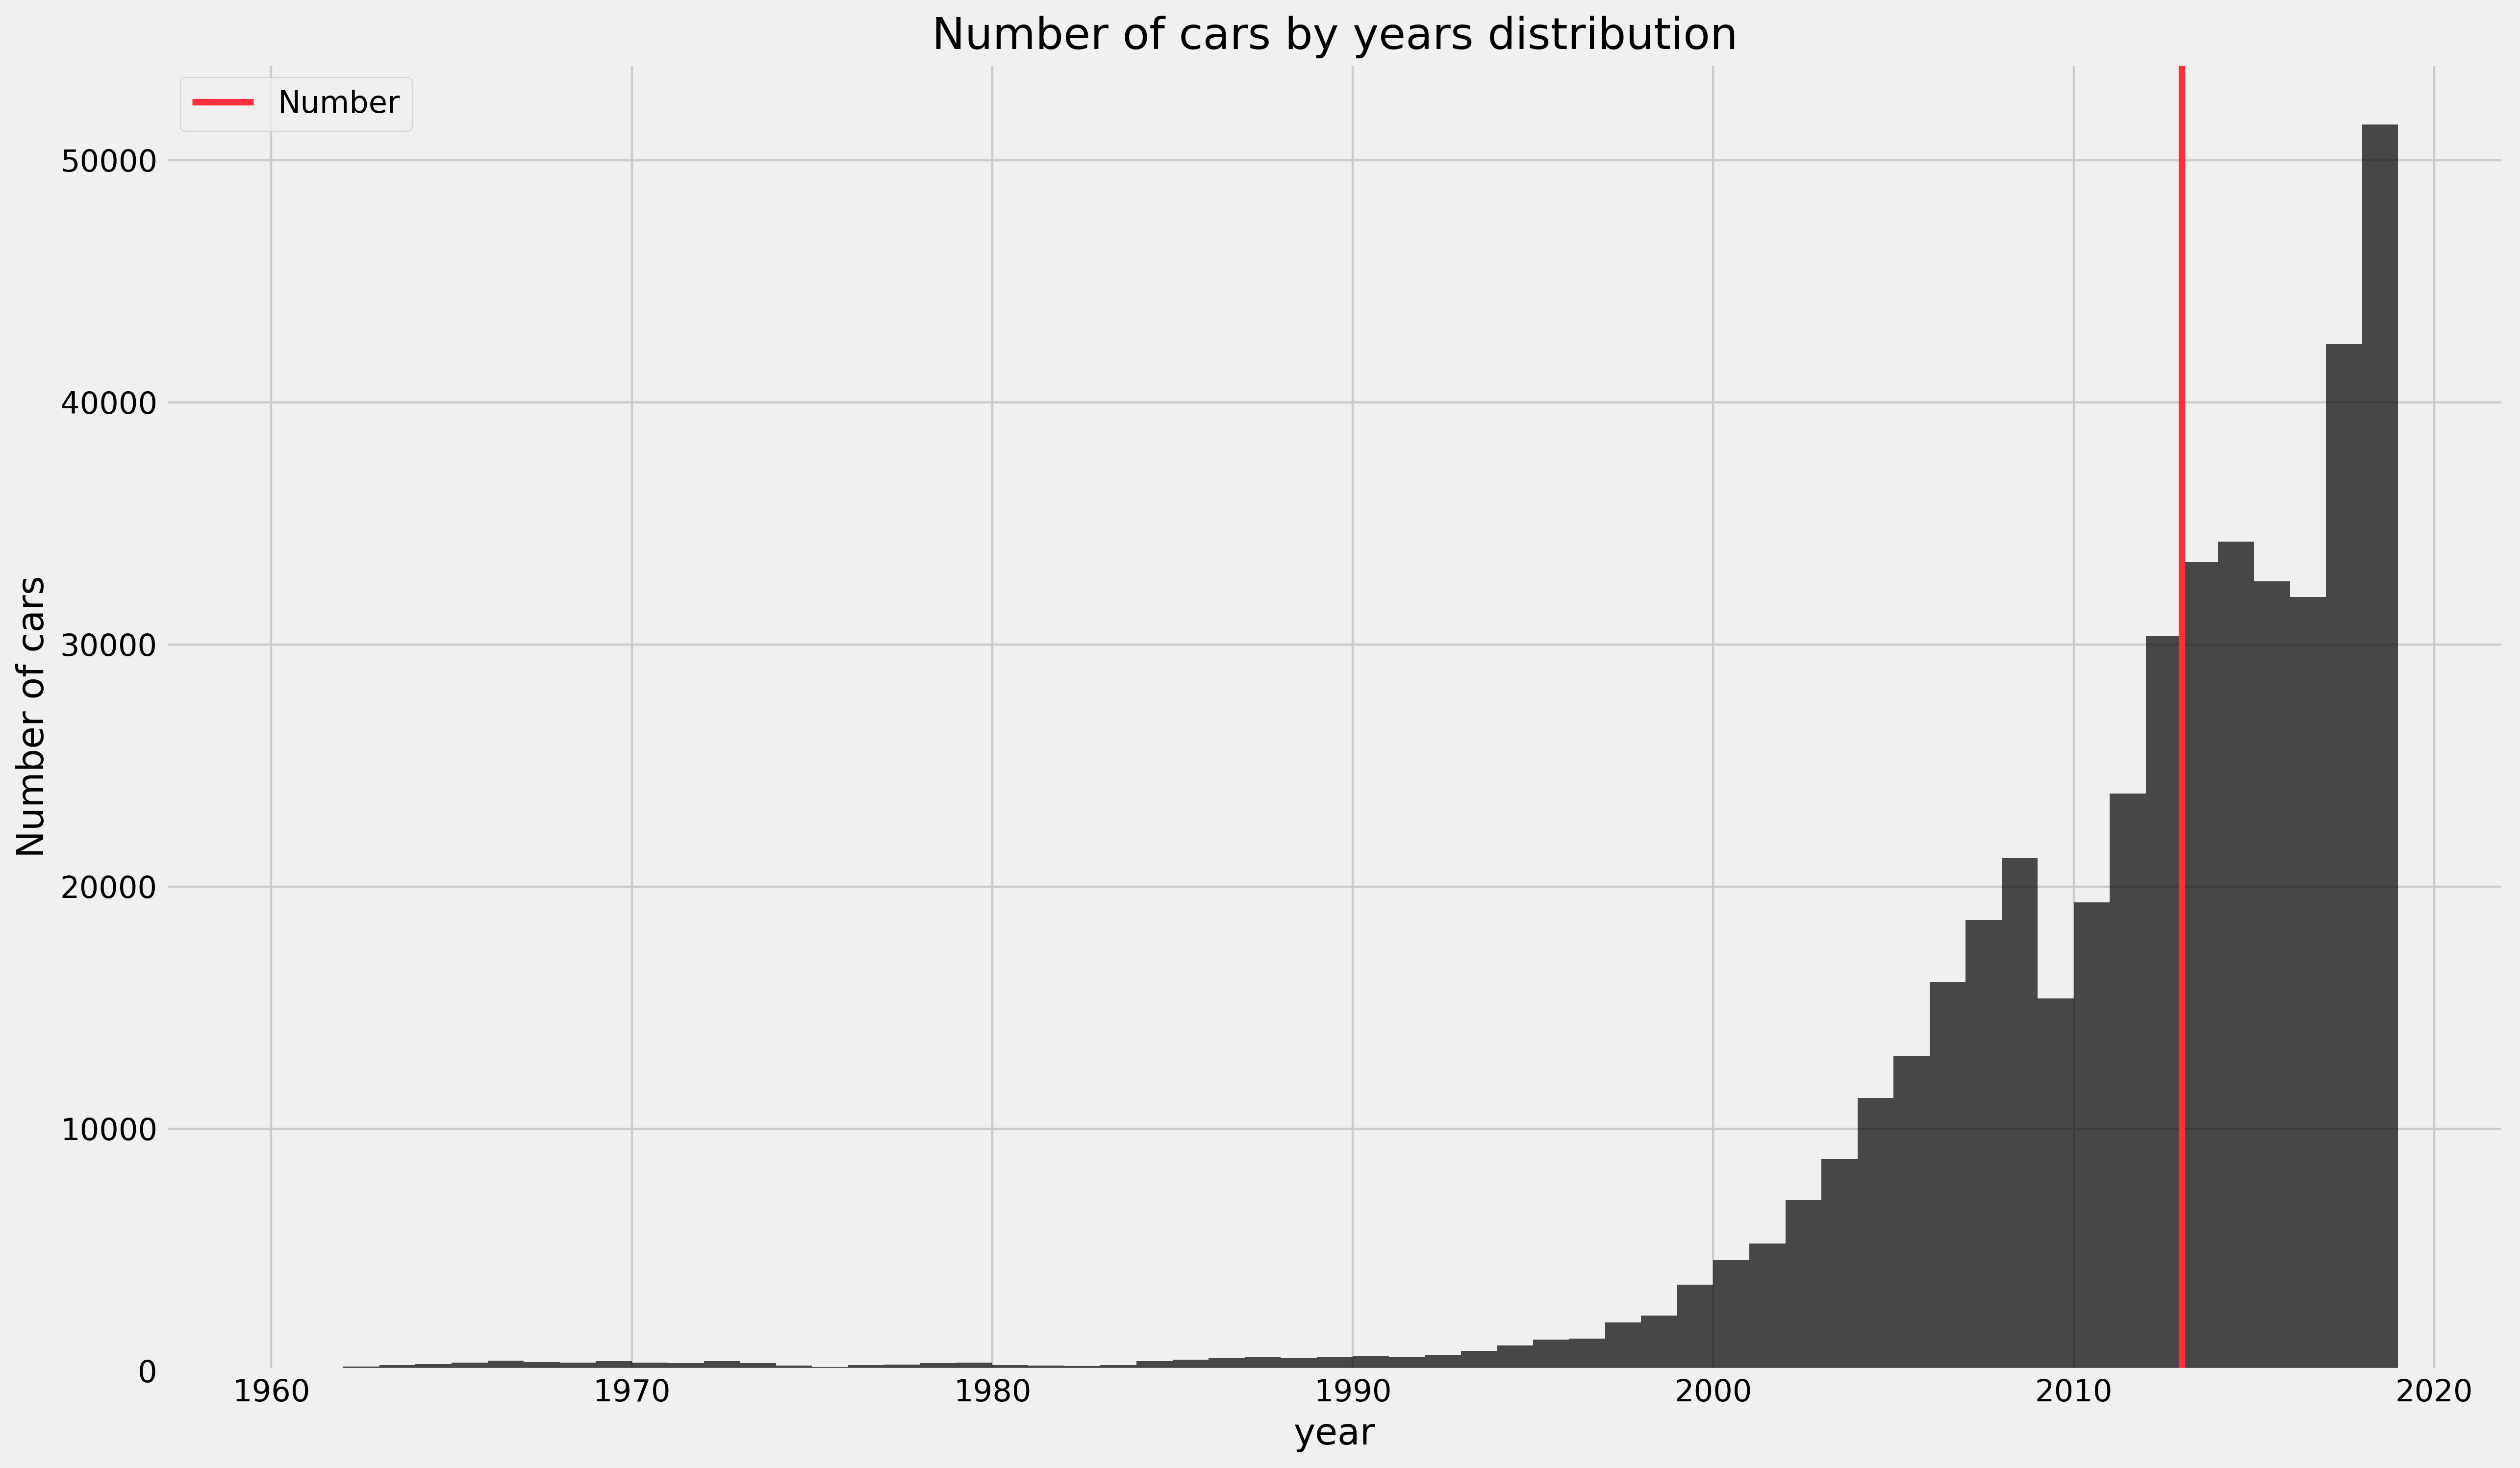

In [6]:
bins=[]

plt.figure(figsize=(16, 9), dpi = 320)
for i in range (1960, 2020):
    bins.append(i)

plt.hist(data['year'],bins=bins, color='Black', alpha= 0.7)
plt.tight_layout()

plt.axvline(data['year'].median(), color = '#ff2f3c', linewidth = 3,  label = 'Number')
plt.title ('Number of cars by years distribution')
plt.gca().set(xlabel='year', ylabel='Number of cars')

plt.legend()
plt.show()

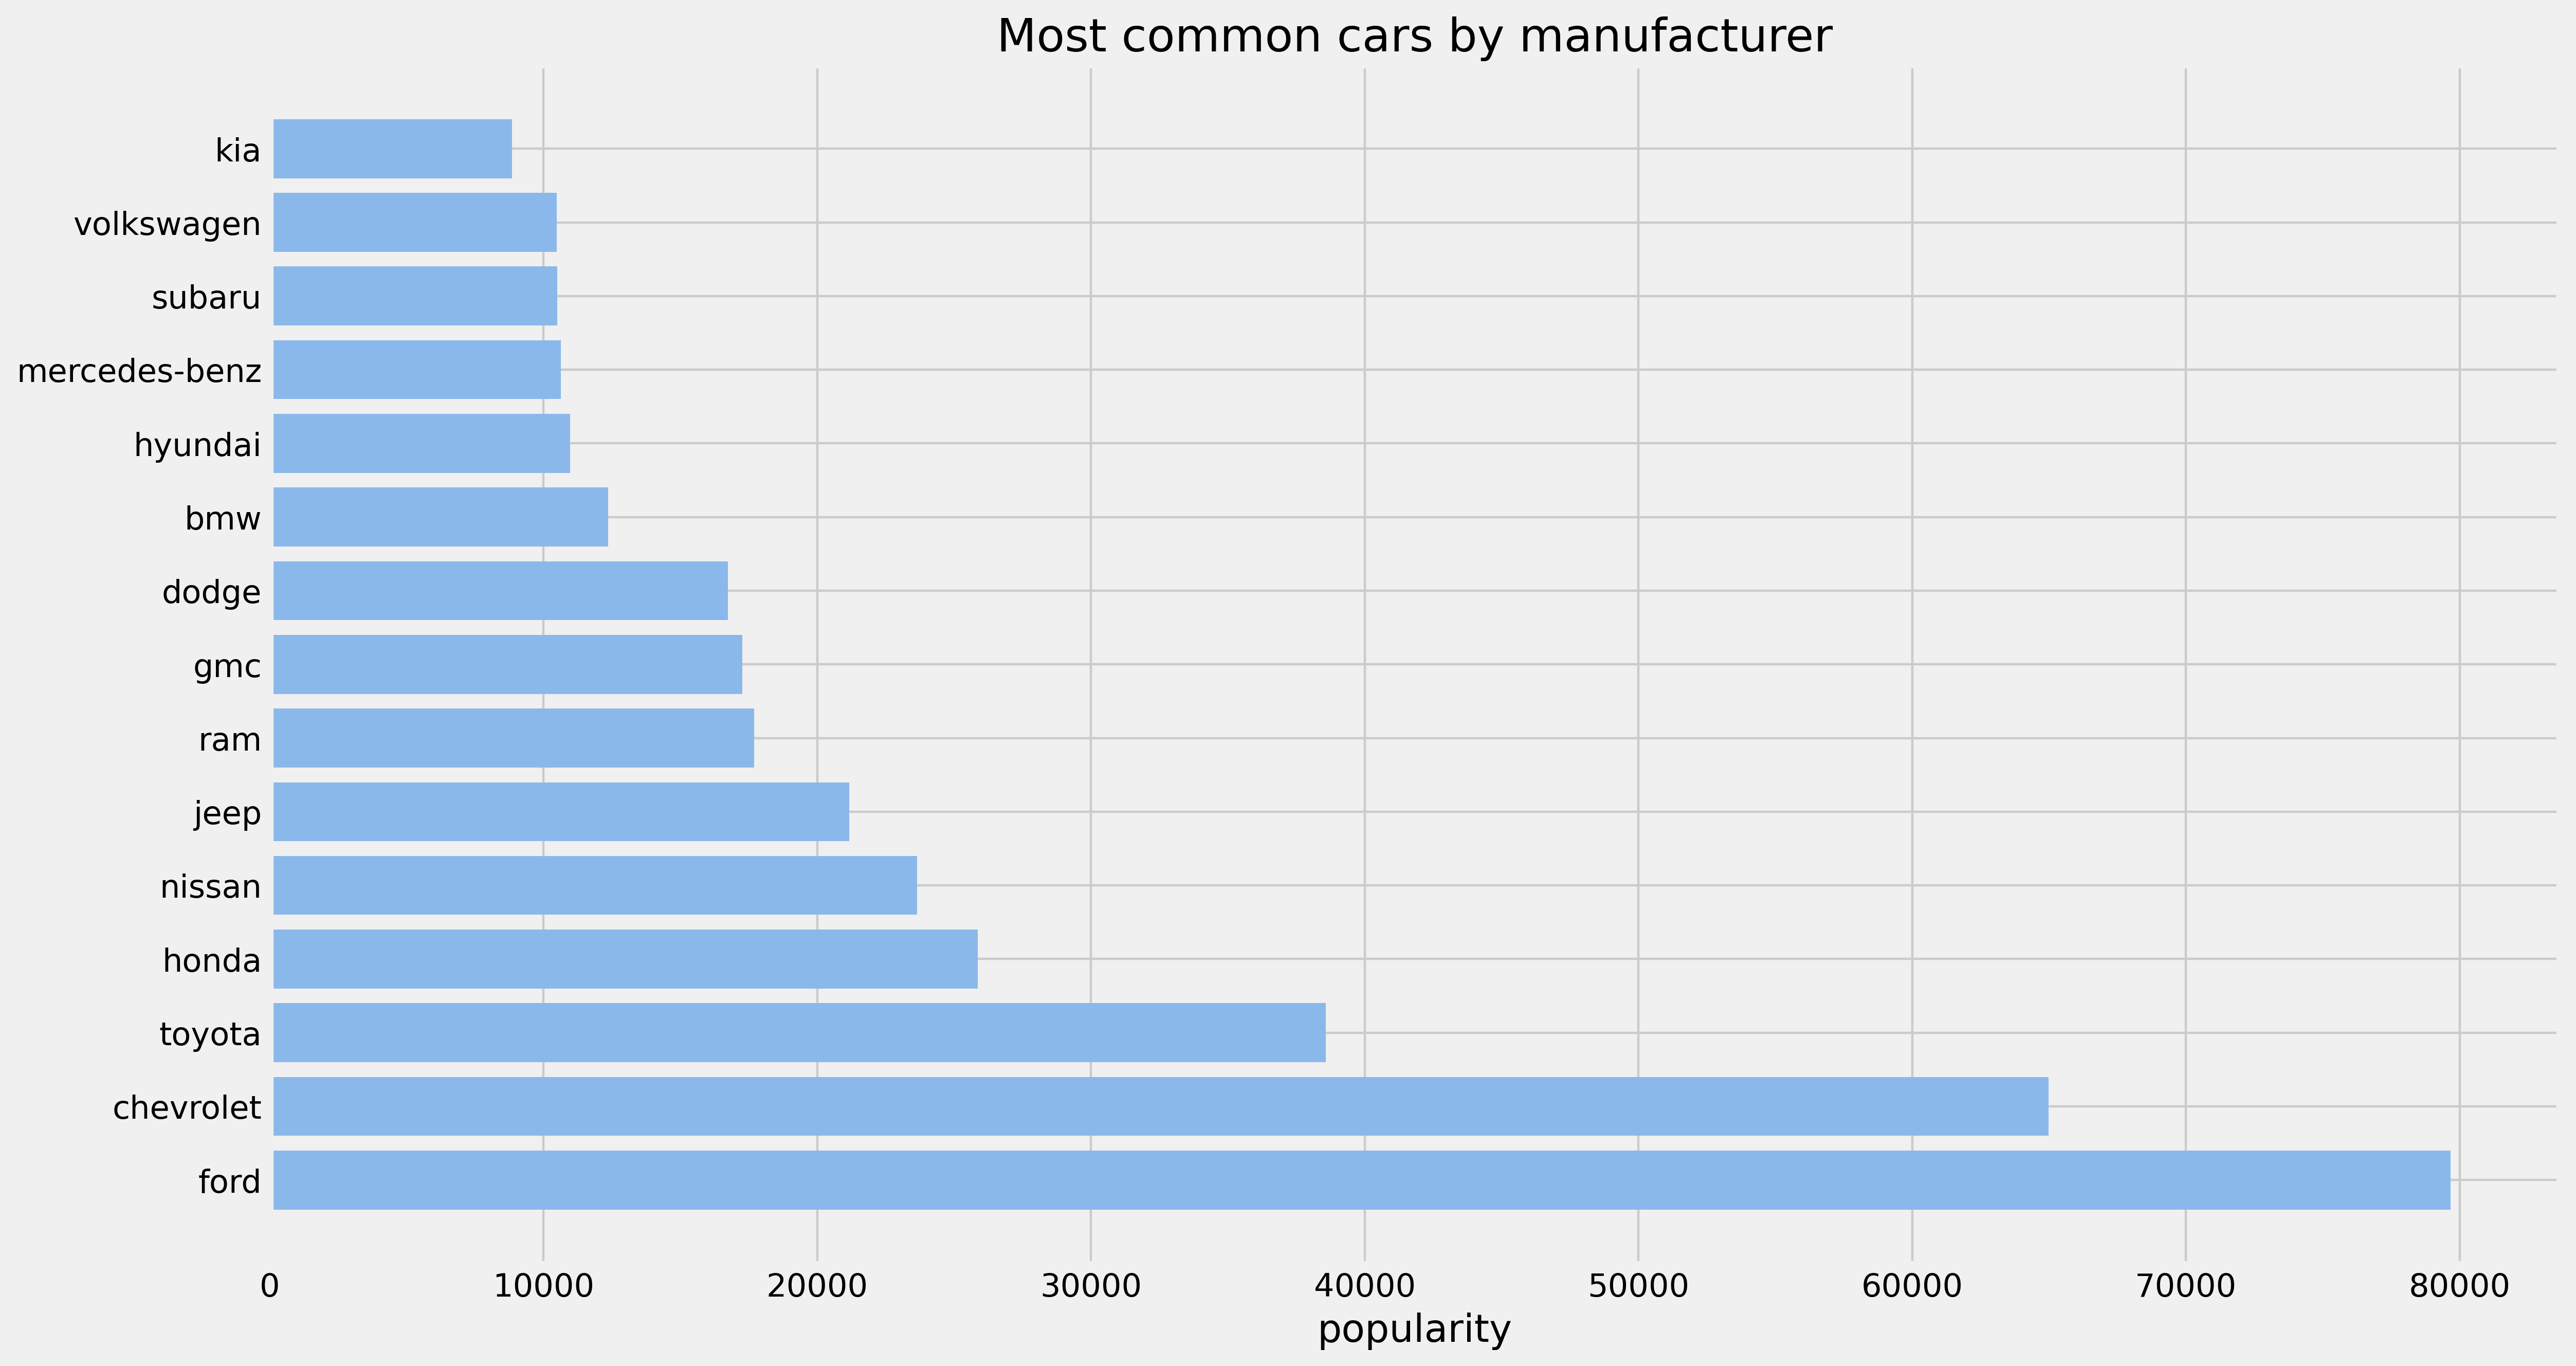

In [7]:
popularity=[]
manufacturer=[]

 
for item in Counter(data['manufacturer'].dropna()).most_common(15):
    popularity.append(int(item[1]))
    manufacturer.append(item[0])
    


plt.figure(figsize=(16, 9), dpi = 320)
plt.barh(manufacturer, popularity, color = '#8bb8eb')
   
    
plt.title("Most common cars by manufacturer")
plt.gca().set(xlabel='popularity')
plt.show()


## Most common cars by manufacturer

On the chart of the distribution of the most popular car brands, you can see that in the United States, American and Japanese cars are mostly popular, while European ones are not so common

### Visual data analysis

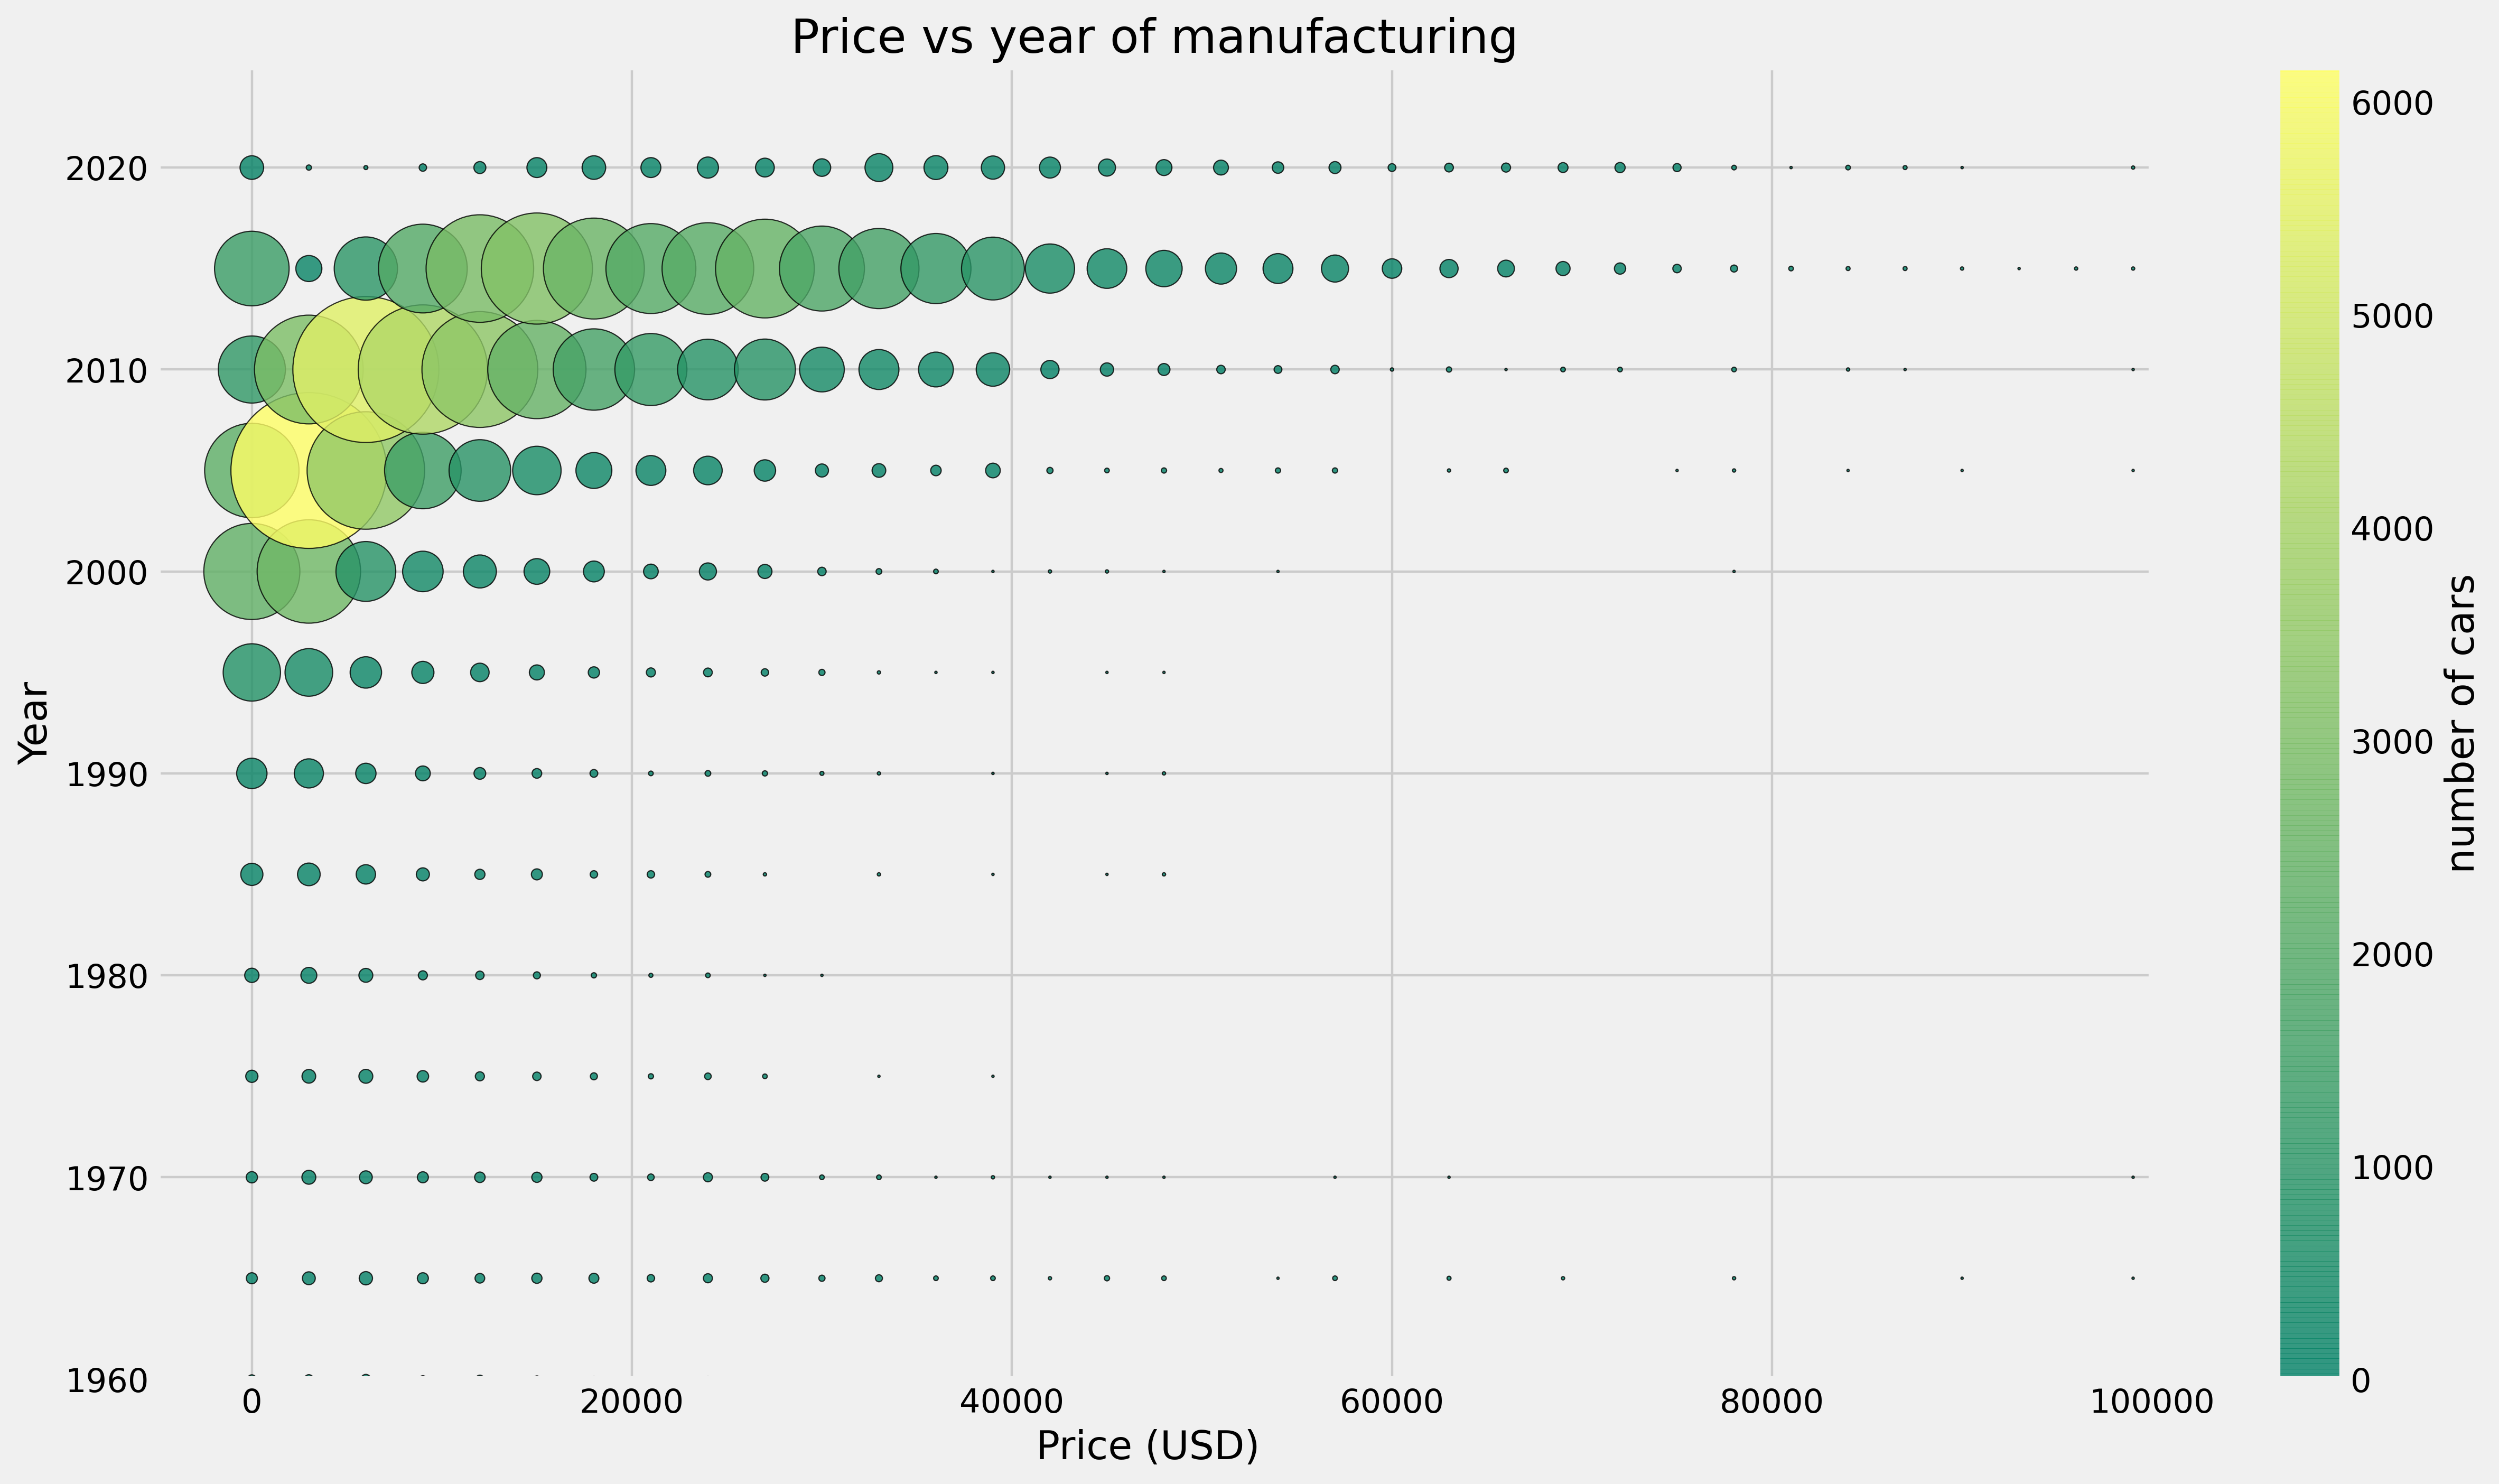

In [8]:

plt.figure(figsize=(16, 9), dpi = 320)

year_copy=data['year']
price_copy=data['price']
data = data.loc[data['price'] > 0]
data['price']=((data['price'])//3000)*3000
data['year']=(data['year']//5)*5




data_counts = data.groupby(['price', 'year']).size().reset_index(name='counts')

plt.scatter(data_counts.price, data_counts.year, c =(data_counts.counts//5), cmap = 'summer', s = (data_counts.counts//7),
            edgecolor='black',  linewidth = 0.5, alpha = 0.8)

cbar = plt.colorbar()
cbar.set_label('number of cars')


axes = plt.gca()
axes.set_xlim([-5000,100000])
axes.set_ylim([1960,2025])


plt.title('Price vs year of manufacturing')
plt.gca().set(ylabel='Year', xlabel='Price (USD) ')

plt.tight_layout()

plt.show()

data['year'] = year_copy
data['price'] = price_copy



### Price vs year of manufacturer

This scatter graph shows that vast majority of cars being sold in the US are 2005-2015 year of manufacturing and their prices vary between 5000 and 20000 USD. Also, we can see that price of the most expensive cars decreases similarly to the year of manufacturing, but below the year of 1980 the price is increasing  

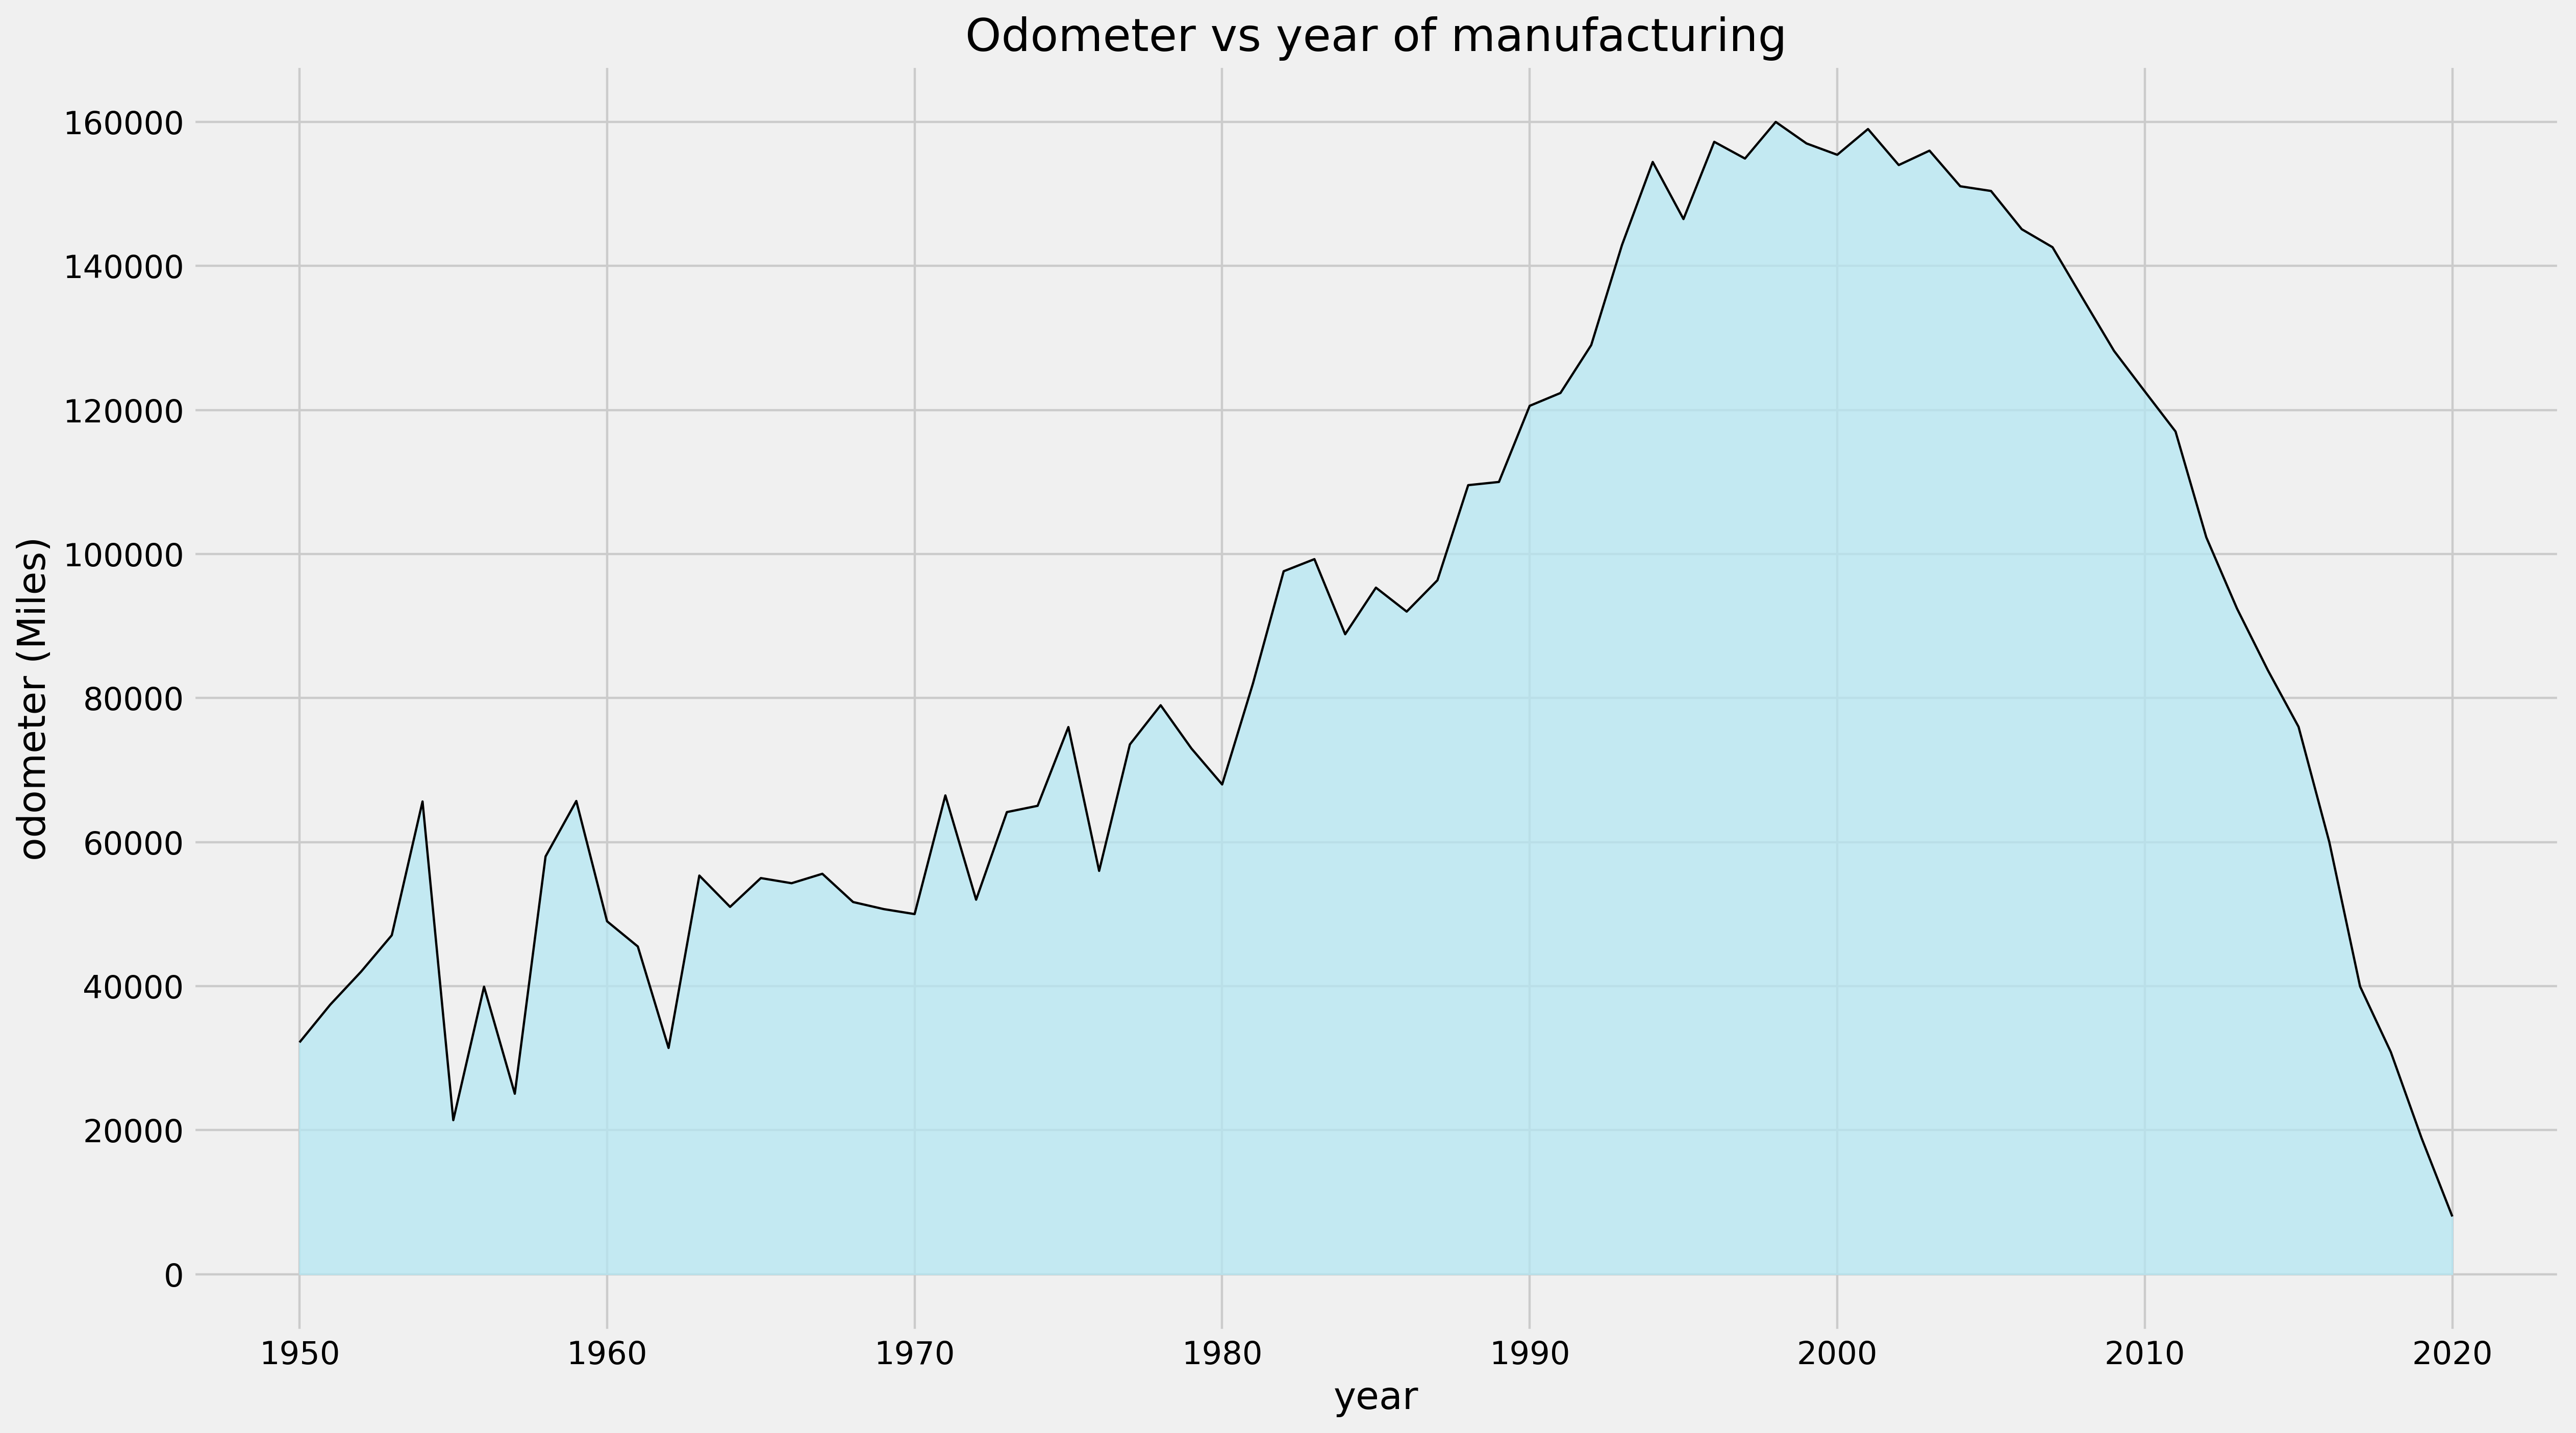

In [9]:
plt.figure(figsize=(16, 9), dpi = 320)

years=[]
odometer_med=[]

data['year'].fillna(data['year'].median(), inplace=True)



data['year']=data['year'].astype(int)

for i in range (1950, 2021):
    odometer_med.append((data['odometer'].loc[data['year'] == i]).median())
    years.append(i)


plt.plot(years, odometer_med, color='black', linewidth = 1)
plt.fill_between(years, odometer_med, alpha = 0.75, color = '#b5e7f3' )


plt.title('Odometer vs year of manufacturing')


plt.gca().set(xlabel='year', ylabel='odometer (Miles)')

plt.tight_layout()

plt.show()

### Odometer vs year of manufacturing

From this graph we can see that median mileage of car by year at first increases with a decrease of the year, but then, earlier than the year of 1995 it drops significantly. We can assume that this decrease is due to the fact that at some point old cars are being sold in better condition, than the new ones, because of their rarity

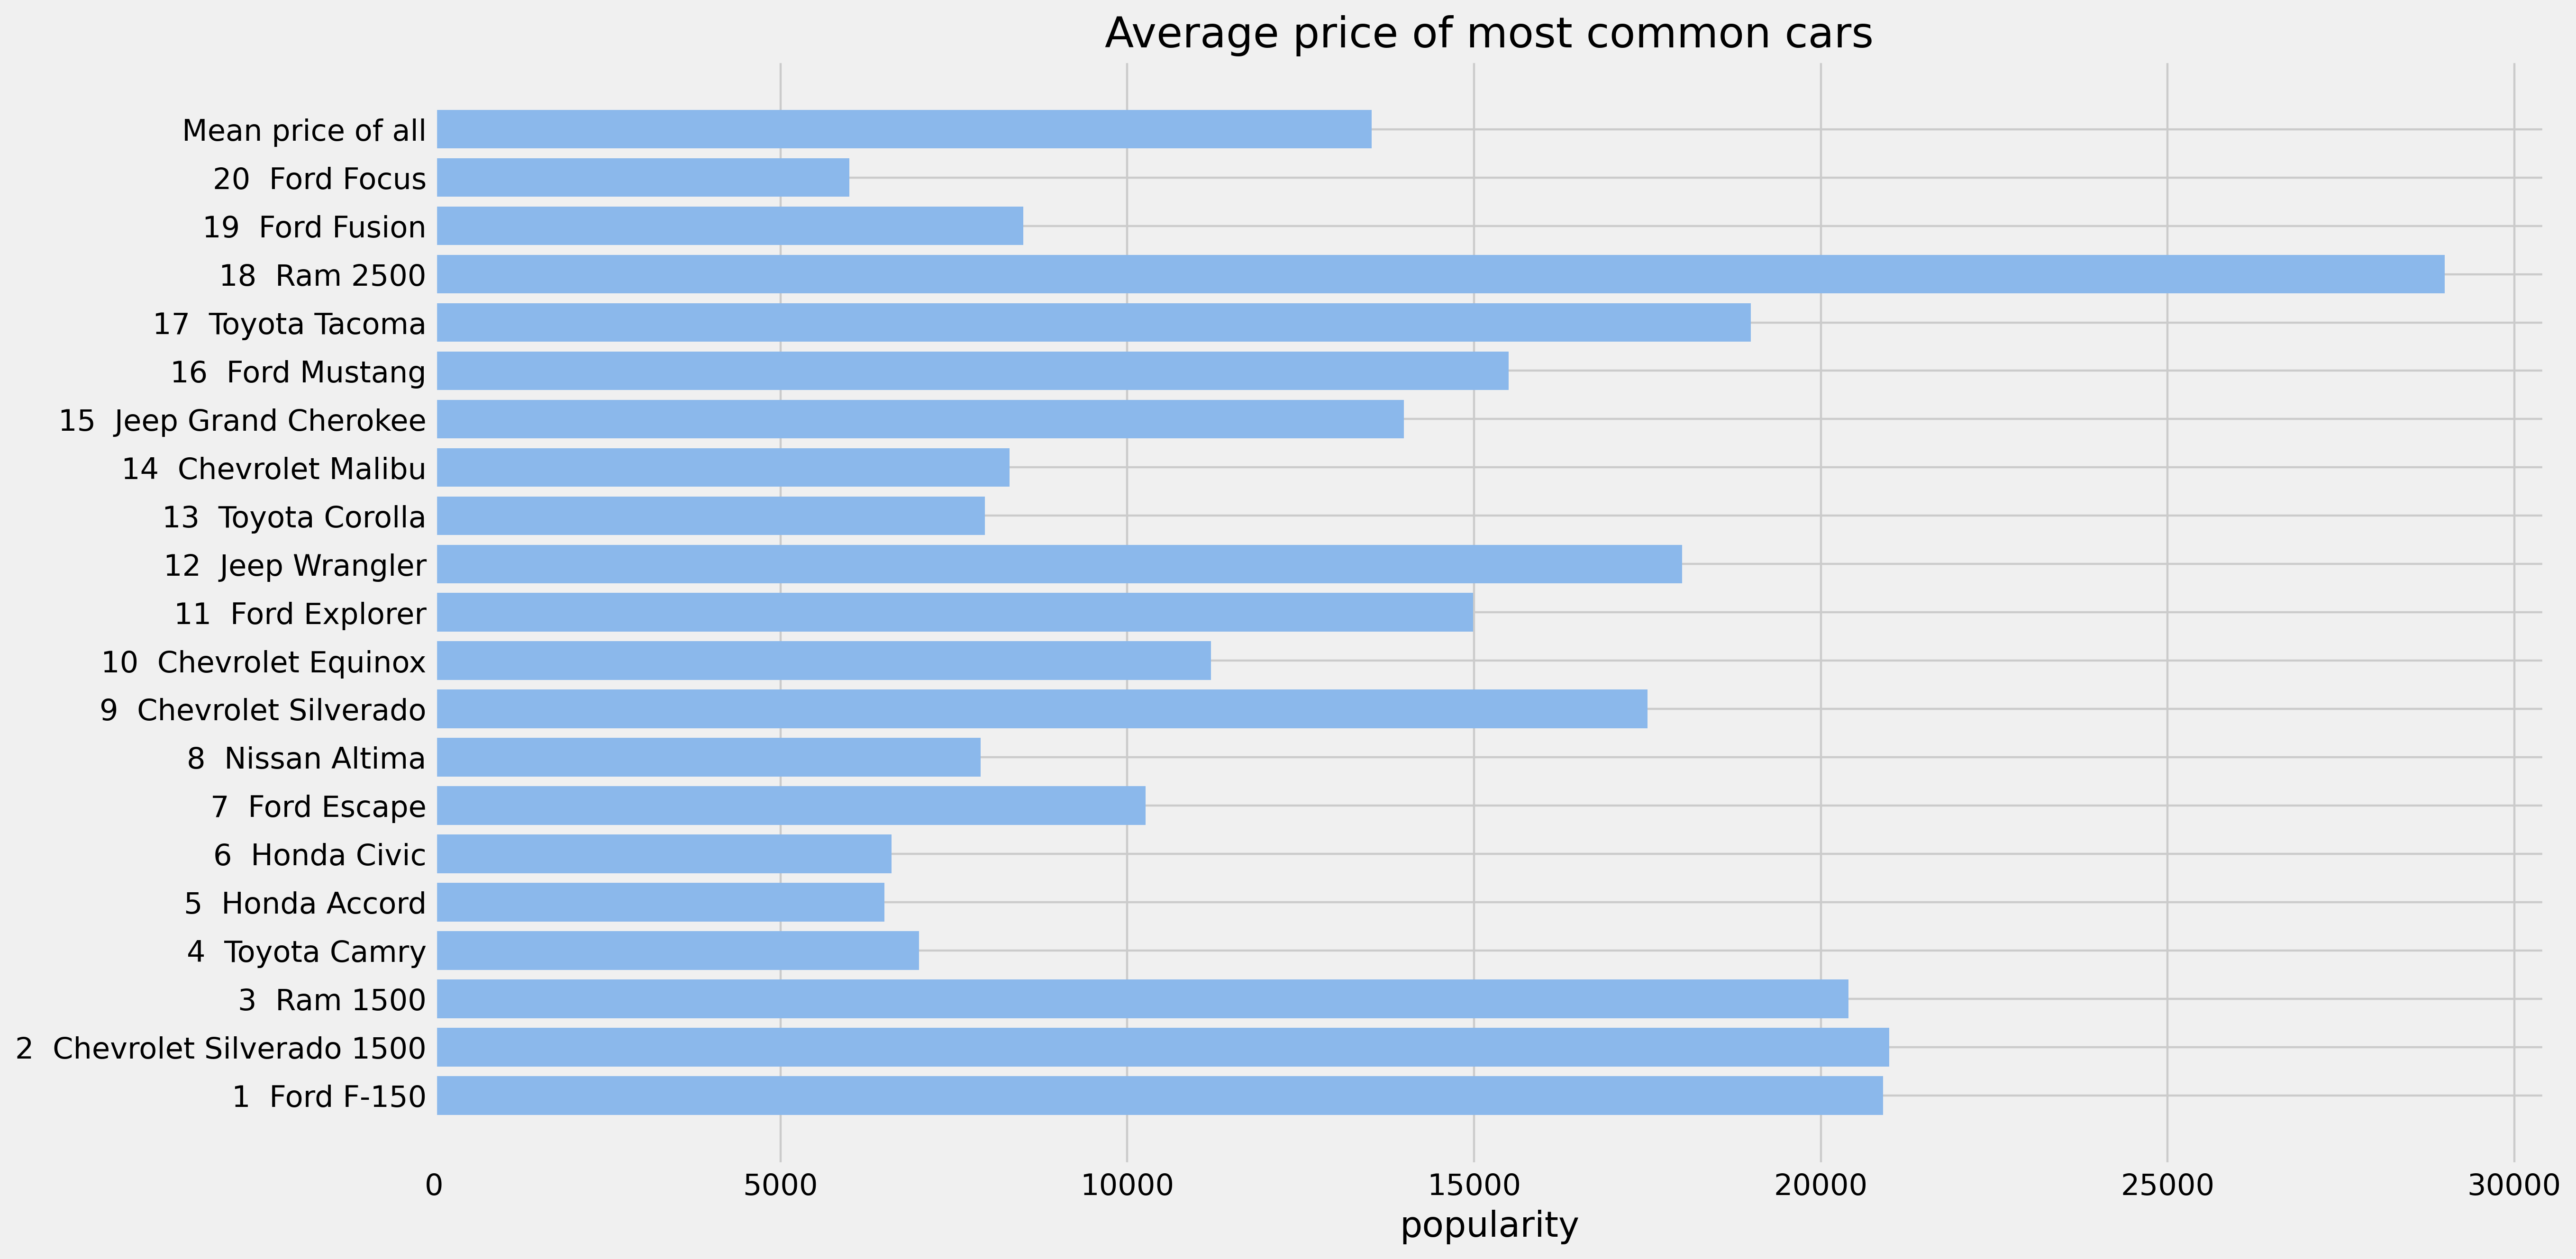

In [10]:
price_med=[]
models=[]
manufacturer=''
 
for item in Counter(data['model'].dropna()).most_common(20):
    price_med.append((data['price'].loc[data['model'] == item[0]]).median())
    models.append(item[0])
for i in range (1, 21):
    manufacturer = data.loc[data['model'] == models[i-1], 'manufacturer'].iloc[0]
    models[i-1]=str(i)+ '  ' + manufacturer.title() + ' '+ models[i-1].title()

price_med.append(sum(price_med)//len(price_med))
models.append('Mean price of all')



fig, ax = plt.subplots(figsize=(16, 9), dpi = 320)
    


ax.barh(models, price_med, color = '#8bb8eb')
   
    
ax.set_title("Average price of most common cars")


plt.gca().set(xlabel='popularity')

plt.show()



### Average price of most common cars

Here we can see 20 most common cars that being sold in the US in the ascending order and a mean price of all of them. As it is already been written above, the most popular brands are American (Ford, Chevrolet, Dodge) and Japanese (Toyota, Nissan, Honda). With a bit of deeper analysis it is clear that most of these cars are not really popular neither in Europe nor in Russia, due to their size - there are many pickups and large SUV's, which are useful in the USA, but not in Europe.

Also, we can see mean price of all of the popular vehicles - it is around 14000, which is, as expected, similar to the median price of all vehicles being sold.